# Polinomio de Taylor y Análisis del Eror



In [ ]:
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

In [ ]:
x = sp.symbols("x")
f = sp.exp(x)
x0 = 0
n=6

In [ ]:
p = sp.series(expr=f, x=x, x0=x0, n=n)
print('Python code '+ str(p))
print('Python latex '+sp.latex(p))
display(Math(sp.latex(p)))

Python code 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)
Python latex 1 + x + \frac{x^{2}}{2} + \frac{x^{3}}{6} + \frac{x^{4}}{24} + \frac{x^{5}}{120} + O\left(x^{6}\right)


<IPython.core.display.Math object>

In [ ]:
max_n = 8
p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2,max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

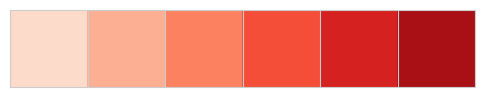

In [ ]:
sns.set_style('whitegrid')
cmap = sns.color_palette('Reds', n_pol)
sns.palplot(cmap)

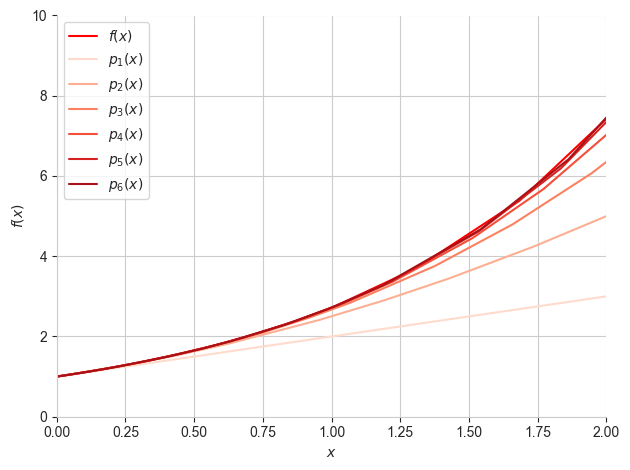

In [ ]:
fig = pls.plot(f,xlim=[0,2],ylim=[0,10], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[0,2],ylim=[0,10], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()

## Cota del error

$|f(1)-P_n(1)| = \frac{\exp(c)}{(n+1)!}\leq \frac{3}{(n+1)!}$

Para $c\in(0,1)$

In [ ]:
pol_deg = np.arange(1,n_pol+1)
print(pol_deg)
estimated_error = [3/mt.factorial(n+1) for n in pol_deg]
print(estimated_error)
f_eval = f.subs(x,1).evalf()
actual_error = []
for n in range(n_pol):
  p_n = p[n]
  p_eval = p_n.subs(x,1).evalf()
  actual_error.append(np.abs(float(f_eval-p_eval)))
print(p_n)
print(actual_error)

[1 2 3 4 5 6]
[1.5, 0.5, 0.125, 0.025, 0.004166666666666667, 0.0005952380952380953]
x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
[0.7182818284590451, 0.2182818284590451, 0.05161516179237857, 0.00994849512571161, 0.0016151617923783057, 0.0002262729034896438]


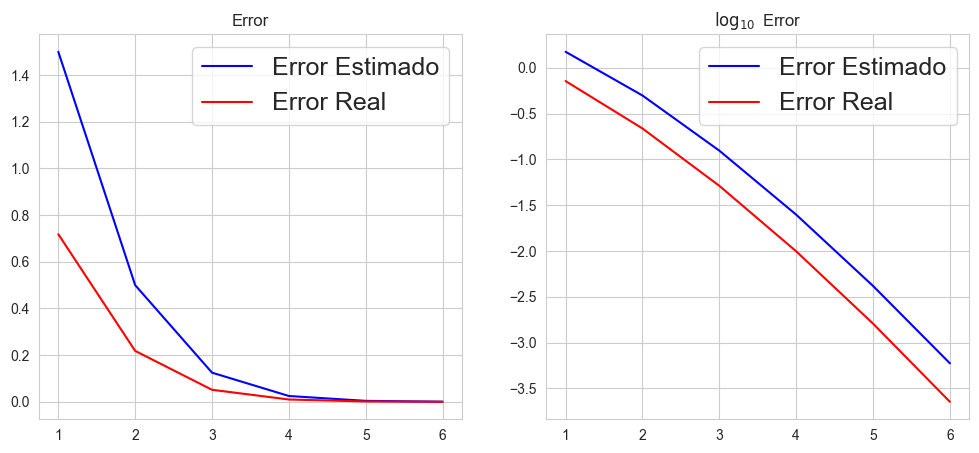

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(pol_deg,estimated_error,color='b')
ax1.plot(pol_deg,actual_error, color = 'r')
ax1.set_title('Error')
ax1.legend(['Error Estimado', 'Error Real'], prop={'size':18})

ax2.plot(pol_deg,np.log10(estimated_error),color='b')
ax2.plot(pol_deg,np.log10(actual_error), color = 'r')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error Estimado', 'Error Real'], prop={'size':18});